In [11]:
import numpy as np


class Perceptron(object):
    def __init__(self, n_iter=10):
        self.n_iter = n_iter

    def fit(self, X, y):
        self._weights = np.zeros(1 + X.shape[1])
        self._errors = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = (target - self.predict(xi))
                self._weights[1:] += update * xi
                self._weights[0] += update
                errors += int(update != 0.0)
            self._errors.append(errors)
        return self

    def predict(self, X):
        return np.where(
            (np.dot(X, self._weights[1:]) + self._weights[0]) >= 0.0,
            1,
            -1
        )

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, cluster_std = 0.5, shuffle = True, random_state=0)
y = np.where(y == 0, -1, 1)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

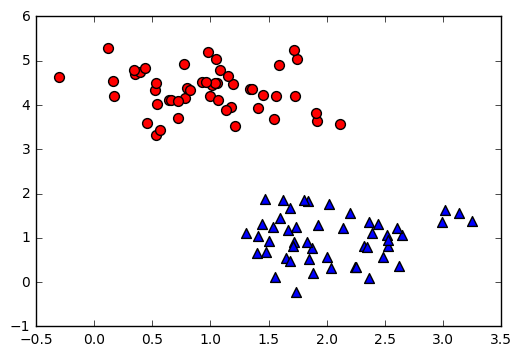

In [14]:
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', marker='o', s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='^', s=50)
plt.show()

In [15]:
p = Perceptron(n_iter=10)
p.fit(X, y)

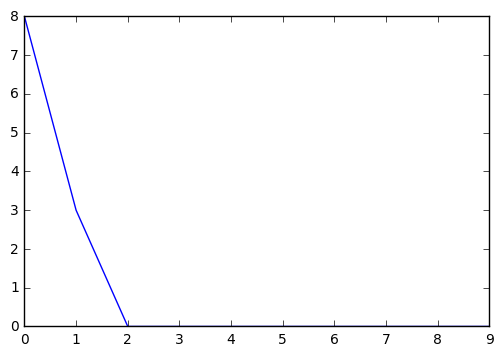

In [16]:
plt.plot(range(len(p._errors)), p._errors)

In [17]:
line_x = np.arange(-0.5, 3.5, 0.5);
line_y = ( -p._weights[0] - p._weights[1] * line_x ) / p._weights[2]

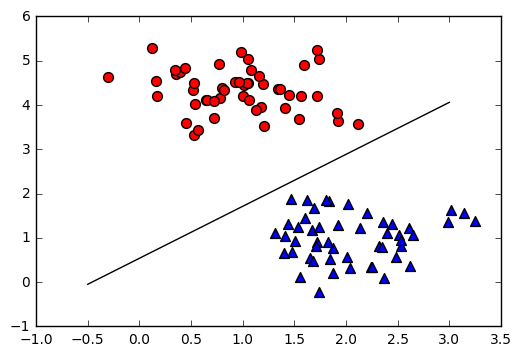

In [18]:
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', marker='o', s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='^', s=50)
plt.plot(line_x, line_y, c='black')
plt.show()